<a href="https://colab.research.google.com/github/brito-rafa/DeepLearningIntro/blob/master/Brito_classifying_newswires_problem4_GPU_regularizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
train_labels[0]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels.shape

(8982, 46)

In [0]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

l2_001_model = models.Sequential()
l2_001_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
l2_001_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
l2_001_model.add(layers.Dense(46, activation='softmax'))

l2_005_model = models.Sequential()
l2_005_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
l2_005_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.005),activation='relu'))
l2_005_model.add(layers.Dense(46, activation='softmax'))

l2_0005_model = models.Sequential()
l2_0005_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
l2_0005_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0005),activation='relu'))
l2_0005_model.add(layers.Dense(46, activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

l2_001_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


l2_005_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


l2_0005_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

partial_x_train.shape

(7982, 10000)

Now let's train our network for 20 epochs:

In [0]:

import time

start_time = time.time()

with tf.device('/gpu:0'):
  history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))
  results = model.evaluate(x_test, one_hot_test_labels)

  l2_001_history = l2_001_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))
  l2_001_results = l2_001_model.evaluate(x_test, one_hot_test_labels)
  
  l2_005_history = l2_005_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))
  l2_005_results = l2_005_model.evaluate(x_test, one_hot_test_labels)
  
  l2_0005_history = l2_0005_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))
  l2_0005_results = l2_0005_model.evaluate(x_test, one_hot_test_labels)
    
time_in_seconds = (time.time() - start_time)
time_in_seconds = round(time_in_seconds,4)
print ('Time in seconds, Google Colaboratory: ', time_in_seconds)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 73us/step - loss: 0.2989 - acc: 0.9379 - val_loss: 0.9535 - val_acc: 0.7960
Epoch 2/8
7982/7982 [==============================] - 1s 74us/step - loss: 0.2552 - acc: 0.9445 - val_loss: 0.9325 - val_acc: 0.8140
Epoch 3/8
7982/7982 [==============================] - 1s 81us/step - loss: 0.2193 - acc: 0.9475 - val_loss: 0.9250 - val_acc: 0.8110
Epoch 4/8
7982/7982 [==============================] - 1s 70us/step - loss: 0.1904 - acc: 0.9508 - val_loss: 0.9880 - val_acc: 0.7960
Epoch 5/8
7982/7982 [==============================] - 1s 70us/step - loss: 0.1721 - acc: 0.9548 - val_loss: 0.9518 - val_acc: 0.8160
Epoch 6/8
7982/7982 [==============================] - 1s 71us/step - loss: 0.1558 - acc: 0.9549 - val_loss: 0.9594 - val_acc: 0.8230
Epoch 7/8
7982/7982 [==============================] - 1s 69us/step - loss: 0.1432 - acc: 0.9549 - val_loss: 1.0181 - val_acc: 0.8140
Epoch 8/8
2246

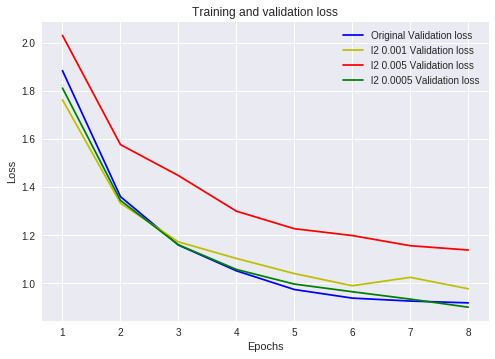

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
l2_001_val_loss = l2_001_history.history['val_loss']
l2_005_val_loss = l2_005_history.history['val_loss']
l2_0005_val_loss = l2_0005_history.history['val_loss']

epochs = range(1, len(loss) + 1)

#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Original Validation loss')
plt.plot(epochs, l2_001_val_loss, 'y', label='l2 0.001 Validation loss')
plt.plot(epochs, l2_005_val_loss, 'r', label='l2 0.005 Validation loss')
plt.plot(epochs, l2_0005_val_loss, 'g', label='l2 0.0005 Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

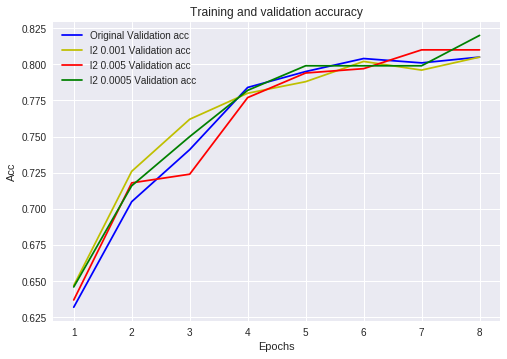

In [0]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']
l2_001_val_acc = l2_001_history.history['val_acc']
l2_005_val_acc = l2_005_history.history['val_acc']
l2_0005_val_acc = l2_0005_history.history['val_acc']

#plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Original Validation acc')
plt.plot(epochs, l2_001_val_acc, 'y', label='l2 0.001 Validation acc')
plt.plot(epochs, l2_005_val_acc, 'r', label='l2 0.005 Validation acc')
plt.plot(epochs, l2_0005_val_acc, 'g', label='l2 0.0005 Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [0]:
results

[1.0838601529757466, 0.7876224399462196]

In [0]:
l2_001_results

[1.1686785556541843, 0.7920747996968874]

In [0]:
l2_005_results

[1.2098871251884997, 0.7889581478183437]

In [0]:
l2_0005_results

[1.1455538162459036, 0.7876224398931434]


Our approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier 
would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [0]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18788958147818344

## Generating predictions on new data

We can verify that the `predict` method of our model instance returns a probability distribution over all 46 topics. Let's generate topic 
predictions for all of the test data:

In [0]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector of length 46:

In [0]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [0]:
np.sum(predictions[0])

0.99999994

The largest entry is the predicted class, i.e. the class with the highest probability:

In [0]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like such:

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


The only thing it would change is the choice of the loss function. Our previous loss, `categorical_crossentropy`, expects the labels to 
follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`:

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

This new loss function is still mathematically the same as `categorical_crossentropy`; it just has a different interface.

## On the importance of having sufficiently large intermediate layers


We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden 
units. Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 
46-dimensional, e.g. 4-dimensional.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s - loss: 3.1620 - acc: 0.2295 - val_loss: 2.6750 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 2.2009 - acc: 0.3829 - val_loss: 1.7626 - val_acc: 0.5990
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.4490 - acc: 0.6486 - val_loss: 1.4738 - val_acc: 0.6390
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 1.2258 - acc: 0.6776 - val_loss: 1.3961 - val_acc: 0.6570
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 1.0886 - acc: 0.7032 - val_loss: 1.3727 - val_acc: 0.6700
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.9817 - acc: 0.7494 - val_loss: 1.3682 - val_acc: 0.6800
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.8937 - acc: 0.7757 - val_loss: 1.3587 - val_acc: 0.6810
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.8213 - a


Our network now seems to peak at ~71% test accuracy, a 8% absolute drop. This drop is mostly due to the fact that we are now trying to 
compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is 
too low-dimensional. The network is able to cram _most_ of the necessary information into these 8-dimensional representations, but not all 
of it.

## Further experiments

* Try using larger or smaller layers: 32 units, 128 units...
* We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

## Wrapping up


Here's what you should take away from this example:

* If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
* In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
* _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification:
    ** Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    ** Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
* If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.